<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 4th exercise: <font color="#C70039">Use Isolation Forest for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   24.11.2025
* Student: Tim Voßmerbäumer
* Matr.Nr.: 11474232

<img src="https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the Isolation Forest algorithm for anomaly detection. Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. The following <a href="https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf">paper</a> explains the details on its theory and implementation. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 

4. take the three data sets from exercize 1 and apply the isolation forest to them.
5. implement an appropriate visualisation (chart) that renders the result (anomaly={yes,no}) for every data point TOGETHER with the original data point in your data set.
-----------------------------------------------------------------------------------

# Heisenberg Code

### First example

In [1]:
from sklearn.ensemble import IsolationForest
import numpy as np
from numpy.random import randn
import pandas as pd

np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

In [ ]:
# Not normally distributed
df_nnorm = pd.read_csv("data/Ex1/Coca_Cola_historical_data.csv") 
# First normally distributed
df_norm1 = pd.read_csv("data/Ex1/random_fitness_dataset.csv") 
# Second normally distributed
df_norm2 = pd.read_csv("data/Ex1/SOCR-HeightWeight.csv")

This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

### Second example

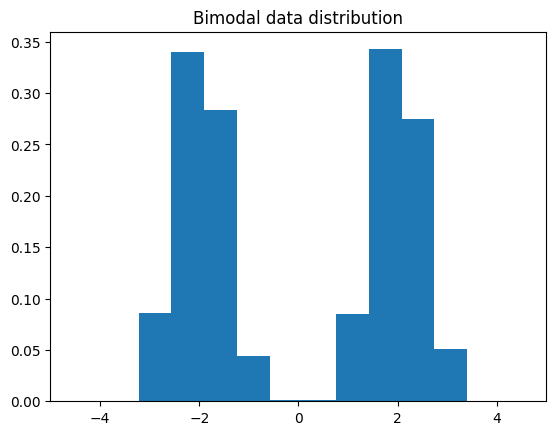

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# create a bimodal data distribution and visualize it
bimod_data = np.concatenate((np.random.normal(loc=-2,scale=.5,size=500), 
                             np.random.normal(loc=2, scale=.5,size=500)))

plt.hist(bimod_data, density=True)
plt.xlim([-5, 5])
plt.title("Bimodal data distribution")
plt.show()

Note, that there are three regions where the data has low probability to appear: 
* one on the right side of the distribution
* another one on the left
* and another around zero. 

Let's see if the IsolationForest is able to identify these three regions

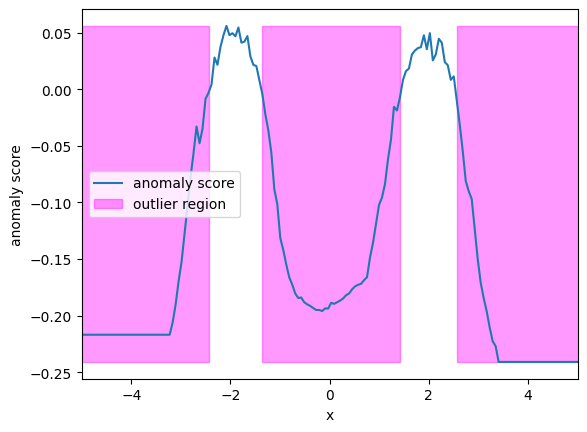

In [4]:
# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(bimod_data.reshape(-1, 1))

# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-6, 6, 200).reshape(-1,1)

# get the anomaly score (y) for each testing data point on x 
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

# visalize both: anomaly_score and outlier
plt.plot(anomaly_score_test_data, anomaly_score, label='anomaly score')
plt.fill_between(anomaly_score_test_data.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier_labels==-1, color='#FF00FF', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

# Coca Cola 'Close' Price

In [47]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples='auto', random_state = 1, contamination= 0.025) # contamination = DBSCAN eps

close_data_reshaped = df_nnorm['Close'].values.reshape(-1, 1)
# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(close_data_reshaped)

print(outlier_labels[-400:])
outlier_count = list(outlier_labels).count(-1)
print(f"\nTotal outliers detected with contamination = 0.025: {outlier_count}")

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

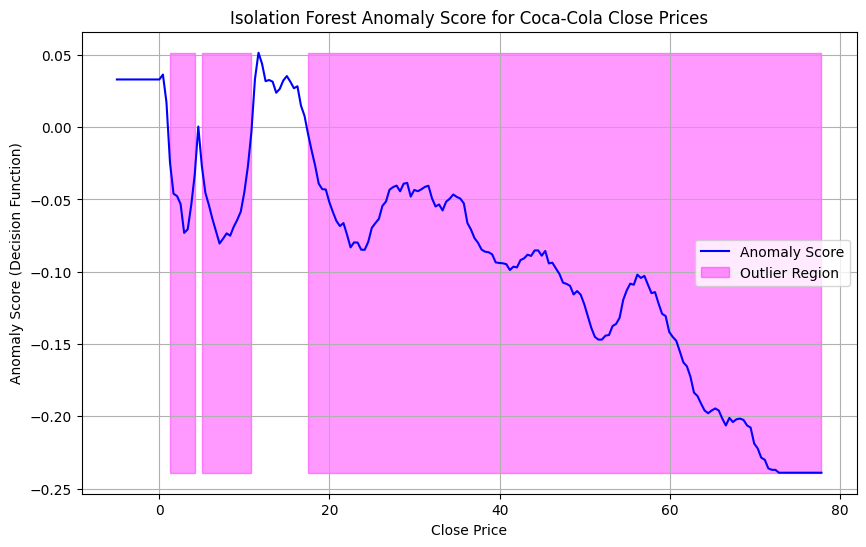

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- Hyperparameters ---
# The IsolationForest is an ensemble method, n_estimators=100 is a good standard.
isolation_forest_close = IsolationForest(n_estimators=100, random_state=1)
isolation_forest_close.fit(close_data_reshaped)

# Determine a test range from below the min price to above the max price
min_val = close_data_reshaped.min() - 5  
max_val = close_data_reshaped.max() + 5  

# Create 200 test points across this range
anomaly_score_test_data = np.linspace(min_val, max_val, 200).reshape(-1, 1)

# Get the anomaly score for each testing data point 
anomaly_score = isolation_forest_close.decision_function(anomaly_score_test_data)

#  Classify into an outlier or not 
outlier_labels = isolation_forest_close.predict(anomaly_score_test_data)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(anomaly_score_test_data, anomaly_score, label='Anomaly Score', color='blue')

plt.fill_between(
    anomaly_score_test_data.T[0], 
    np.min(anomaly_score), 
    np.max(anomaly_score), 
    where=outlier_labels == -1, 
    color='#FF00FF', 
    alpha=0.4, 
    label='Outlier Region'
)

plt.legend()
plt.ylabel('Anomaly Score (Decision Function)')
plt.xlabel('Close Price')
plt.title('Isolation Forest Anomaly Score for Coca-Cola Close Prices')
plt.grid(True)
plt.show()

### Result
The region below x = appears to be Noise that probably comes from putting the min and max value lower or higher than the actual data.
The extensive region after approx. x = 18 shows that the somewhat recent price surge of the CC stocks have been correctly classified as outliers. 

# Fitness Dataset 'calories_burned'

In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples='auto', random_state = 1, contamination= 0.5) # contamination was chosen to find the really extreme outliers.

fitness_data_reshaped = df_norm1['calories_burned'].values.reshape(-1, 1)
# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(fitness_data_reshaped)

print(outlier_labels[-200:])
outlier_count = list(outlier_labels).count(-1)
print(f"\nTotal outliers detected with contamination = 0.5: {outlier_count}")

[ 1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1
 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1
  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1
 -1 -1  1 -1  1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1
  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1
  1  1 -1 -1 -1 -1  1 -1]

Total outliers detected with contamination = 0.5: 100


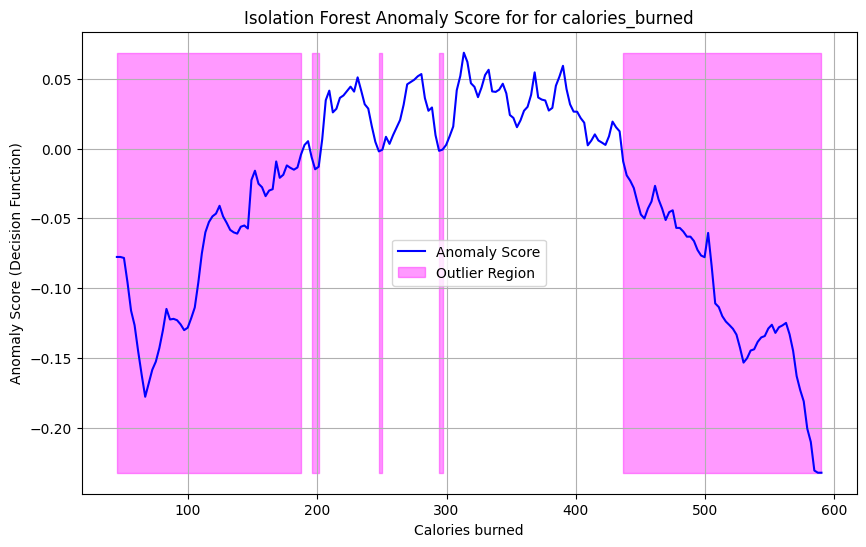

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- Hyperparameters ---
# The IsolationForest is an ensemble method, n_estimators=100 is a good standard.
isolation_forest_close = IsolationForest(n_estimators=100, random_state=1)
isolation_forest_close.fit(fitness_data_reshaped)

# Determine a test range from below the min price to above the max price
min_val = fitness_data_reshaped.min() - 5  
max_val = fitness_data_reshaped.max() + 5  

# Create 200 test points across this range
anomaly_score_test_data = np.linspace(min_val, max_val, 200).reshape(-1, 1)

# Get the anomaly score for each testing data point 
anomaly_score = isolation_forest_close.decision_function(anomaly_score_test_data)

#  Classify into an outlier or not 
outlier_labels = isolation_forest_close.predict(anomaly_score_test_data)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(anomaly_score_test_data, anomaly_score, label='Anomaly Score', color='blue')

plt.fill_between(
    anomaly_score_test_data.T[0], 
    np.min(anomaly_score), 
    np.max(anomaly_score), 
    where=outlier_labels == -1, 
    color='#FF00FF', 
    alpha=0.4, 
    label='Outlier Region'
)

plt.legend()
plt.ylabel('Anomaly Score (Decision Function)')
plt.xlabel('Calories burned')
plt.title('Isolation Forest Anomaly Score for for calories_burned')
plt.grid(True)
plt.show()

### Result
The Isolation Forest behaves as expected for a near-normal dataset: it detects the sparse tails of the distribution as the primary anomalies, confirming that the very low and very high calorie values are the easiest points to isolate.
It also found some outlier regions around 200, approx. 250 and just below 300. This suggest that even within the central, normal range, there was a drop in density, making them easier to isolate, than their neighbors.

# Height Dataset

In [48]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples='auto', random_state = 1, contamination= 0.01) # contamination was chosen to find the really extreme outliers -> behind 3 sigma for a normal distribution

height_data_reshaped = df_norm2['Height(Inches)'].values.reshape(-1, 1)
# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(height_data_reshaped)

print(outlier_labels[-500:])
outlier_count = list(outlier_labels).count(-1)
print(f"\nTotal outliers detected with contamination = 0.5: {outlier_count}")

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

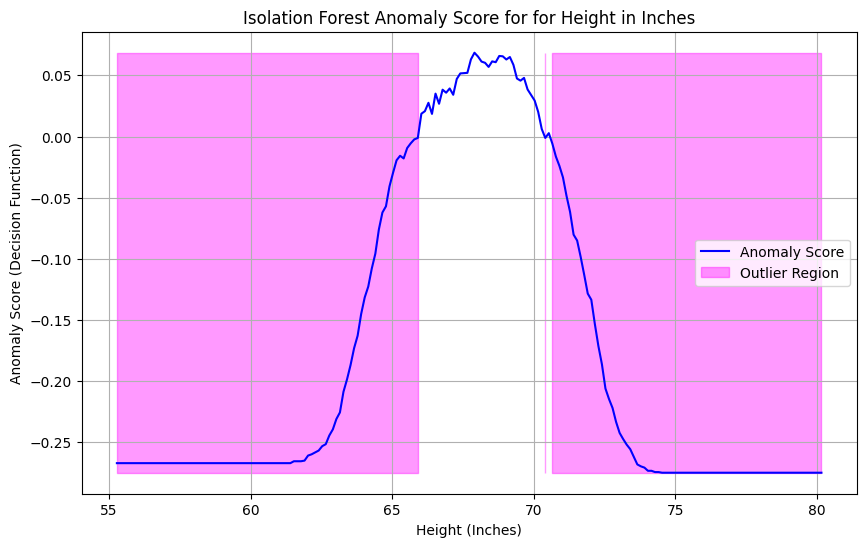

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- Hyperparameters ---
# The IsolationForest is an ensemble method, n_estimators=100 is a good standard.
isolation_forest_close = IsolationForest(n_estimators=100, random_state=1)
isolation_forest_close.fit(height_data_reshaped)

# Determine a test range from below the min price to above the max price
min_val = height_data_reshaped.min() - 5  
max_val = height_data_reshaped.max() + 5  

# Create 200 test points across this range
anomaly_score_test_data = np.linspace(min_val, max_val, 200).reshape(-1, 1)

# Get the anomaly score for each testing data point 
anomaly_score = isolation_forest_close.decision_function(anomaly_score_test_data)

#  Classify into an outlier or not 
outlier_labels = isolation_forest_close.predict(anomaly_score_test_data)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(anomaly_score_test_data, anomaly_score, label='Anomaly Score', color='blue')

plt.fill_between(
    anomaly_score_test_data.T[0], 
    np.min(anomaly_score), 
    np.max(anomaly_score), 
    where=outlier_labels == -1, 
    color='#FF00FF', 
    alpha=0.4, 
    label='Outlier Region'
)

plt.legend()
plt.ylabel('Anomaly Score (Decision Function)')
plt.xlabel('Height (Inches)')
plt.title('Isolation Forest Anomaly Score for for Height in Inches')
plt.grid(True)
plt.show()

### Result
The symmetrical shape of the score curve perfectly mirrors the bell-shaped probability density function of a normal distribution.
The curve shows a large, prominent peak in the center, ranging from approximately 65 to 72 inches. This entire region has a positive Anomaly Score, indicating high density. Therefore points here are hard to isolate, leading to high anomaly Scores.
The outlier regions are almost perfectly symmetrical to each other, further proofing the normal distribution.